In [27]:
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv('zippeddata/bom.movie_gross.csv')


In [29]:
df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [30]:
df['foreign_gross'] = pd.to_numeric(df['foreign_gross'],errors='coerce')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2032 non-null float64
year              3387 non-null int64
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


In [32]:
df.head()
df.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1355
year                 0
dtype: int64

In [76]:
dfstudio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1246 entries, 0 to 1246
Data columns (total 8 columns):
movie                1246 non-null object
studio               1245 non-null object
year                 1246 non-null int64
id                   1246 non-null int64
release_date         1246 non-null object
production_budget    1246 non-null int64
domestic_gross_y     1246 non-null object
worldwide_gross      1246 non-null object
dtypes: int64(3), object(5)
memory usage: 127.6+ KB


In [35]:
dfstudio.head()

,movie,studio,year,id,release_date,production_budget,domestic_gross_y,worldwide_gross
0,Toy Story 3,BV,2010,47,"Jun 18, 2010","$200,000,000","$415,004,880","$1,068,879,522"
2,Shrek Forever After,P/DW,2010,27,"May 21, 2010","$165,000,000","$238,736,787","$756,244,673"
3,The Twilight Saga: Eclipse,Sum.,2010,53,"Jun 30, 2010","$68,000,000","$300,531,751","$706,102,828"
4,Iron Man 2,Par.,2010,15,"May 7, 2010","$170,000,000","$312,433,331","$621,156,389"
5,Tangled,BV,2010,15,"Nov 24, 2010","$260,000,000","$200,821,936","$586,477,240"


In [41]:
dfstudio['production_budget'] = clean_currency_columns(dfstudio['production_budget'])

In [39]:
def clean_currency_columns(column):
    return column.str.replace("$","").str.replace(",","").astype(int)

In [67]:



top20studios = pd.DataFrame(dfstudio.groupby('studio')['production_budget'].agg(['median','sum']).sort_values(by = 'sum',ascending = False)[:10])
                                                       
                                                       
                                                       
                    
                                                       
                                                       
                                                       
                                                       
                                                       
                                                       
                                                       
                                                       
                                                       
                                                       

In [68]:
top20studios.reset_index(inplace=True)

In [69]:
dfstudio.groupby('studio')['production_budget'].agg(['median','sum']).unstack.plt().bar()

AttributeError: 'function' object has no attribute 'plt'

In [77]:
from statistics import mean 
dfstudio['averagebudget'] = dfstudio['production_budget'].apply(lambda x: mean(x))

TypeError: 'int' object is not iterable

In [ ]:
.unstack().plot.bar()

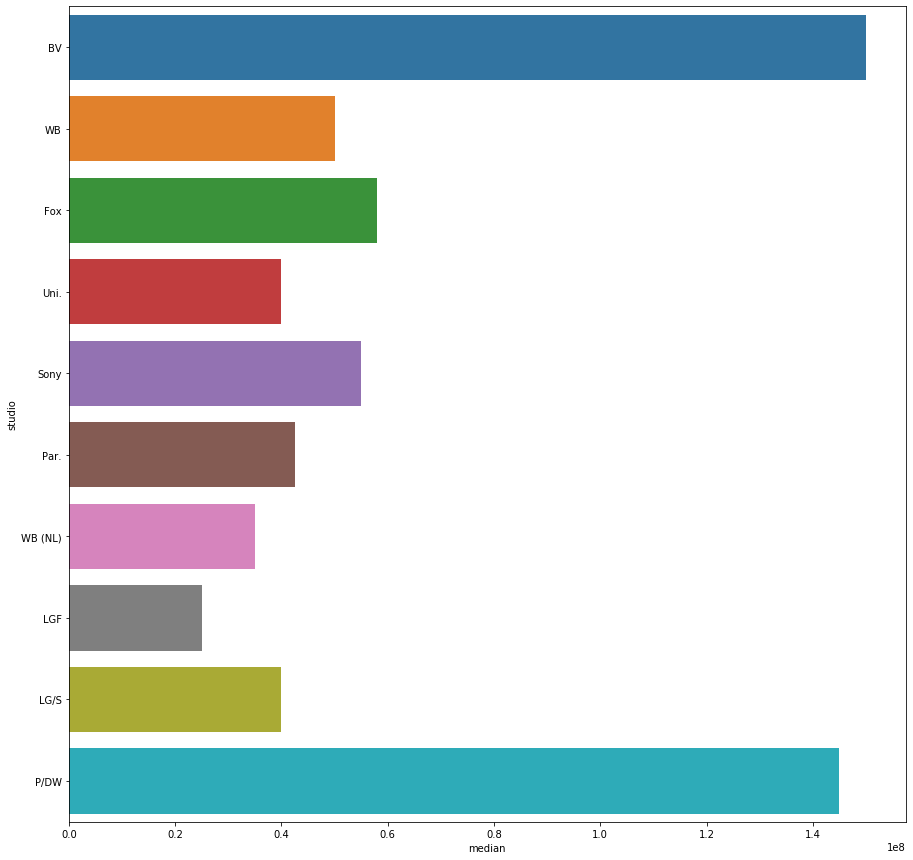

In [63]:
fig, axes=plt.subplots(nrows=1, ncols=1, figsize=(15,15))
ax = sns.barplot(y='studio',x='median',data =top20studios)

In [46]:
top20studios

studio
BV          150000000
P/DW        145000000
NM           70000000
Fox          58000000
Sony         55000000
WB           50000000
MBox         46300000
Strand       45000000
MGM          43000000
Par.         42500000
Studio 8     40500000
Uni.         40000000
BSC          40000000
LG/S         40000000
WB (NL)      35000000
Sum.         33400000
STX          30000000
GrtIndia     30000000
FD           27500000
ALP          26000000
Name: production_budget, dtype: int64

In [36]:
import seaborn as sns

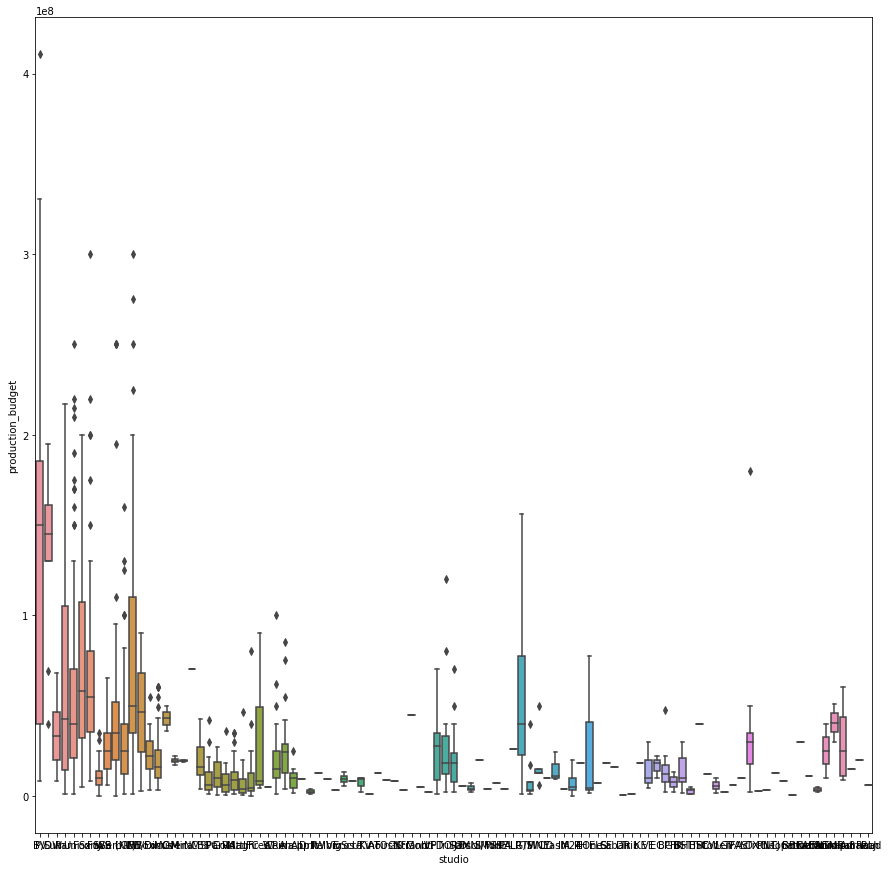

In [42]:
fig, axes=plt.subplots(nrows=1, ncols=1, figsize=(15,15))
ax = sns.boxplot(x = 'studio', y = 'production_budget', data=dfstudio)

In [34]:
dfstudio.drop(columns = 'domestic_gross_x', index = 1, inplace = True)

KeyError: '[1] not found in axis'

In [ ]:
dfstudio.drop(columns = 'foreign_gross', inplace = True)

In [ ]:
dfstudio.head()

In [138]:
dfstudio['movie'].value_counts()


Fantastic Four    2
The Square        2
Legend            2
Trance            2
Unknown           2
                 ..
Seventh Son       1
Coco              1
Non-Stop          1
Hop               1
Deadpool          1
Name: movie, Length: 1237, dtype: int64

In [ ]:
## Checking to ensure these are different movies

In [142]:
dfstudio.loc[dfstudio['movie'] == "Trance"]

,movie,studio,year,id,release_date,production_budget,domestic_gross_y,worldwide_gross
601,Trance,FoxS,2013,71,"Apr 5, 2013","$16,000,000","$2,322,593","$22,594,052"
602,Trance,FoxS,2013,31,"Dec 31, 2012","$950,000",$0,$0


In [143]:
dfstudio.loc[dfstudio['movie'] == "Fantastic Four"]

,movie,studio,year,id,release_date,production_budget,domestic_gross_y,worldwide_gross
796,Fantastic Four,Fox,2015,98,"Aug 7, 2015","$120,000,000","$56,117,548","$167,849,187"
797,Fantastic Four,Fox,2015,85,"Jul 8, 2005","$87,500,000","$154,696,080","$333,132,750"


In [145]:
# Rename domestic Gross
dfstudio.rename(columns = {'domestic_gross_y': 'domestic_gross'}, inplace = True)

In [146]:
def clean_currency_columns(column):
    return column.str.replace("$","").str.replace(",","").astype(int)

In [148]:
dfstudio['worldwide_gross'] = clean_currency_columns(dfstudio['worldwide_gross'])

In [149]:
dfstudio['production_budget'] = clean_currency_columns(dfstudio['production_budget'])

In [150]:
dfstudio['domestic_gross'] = clean_currency_columns(dfstudio['domestic_gross'])

In [151]:
dfstudio['foreign_gross'] = dfstudio['worldwide_gross'] - dfstudio['domestic_gross']

In [153]:
dfstudio['worldwide_net'] = dfstudio['worldwide_gross'] - dfstudio['production_budget']

In [155]:
dfstudio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1246 entries, 0 to 1246
Data columns (total 10 columns):
movie                1246 non-null object
studio               1245 non-null object
year                 1246 non-null int64
id                   1246 non-null int64
release_date         1246 non-null object
production_budget    1246 non-null int64
domestic_gross       1246 non-null int64
worldwide_gross      1246 non-null int64
foreign_gross        1246 non-null int64
worldwide_net        1246 non-null int64
dtypes: int64(7), object(3)
memory usage: 107.1+ KB


In [2]:
import seaborn as sns

In [ ]:
fig, axes=plt.subplots(nrows=1, ncols=1, figsize=(20,20))
ax = sns.barplot(x = 'randomgenre', y = 'worldwide_gross', data=top5genresdf)

In [180]:
topgrossbystudio = dfnew.groupby('studio')['worldwide_gross'].sum().sort_values(ascending = False)[:10]

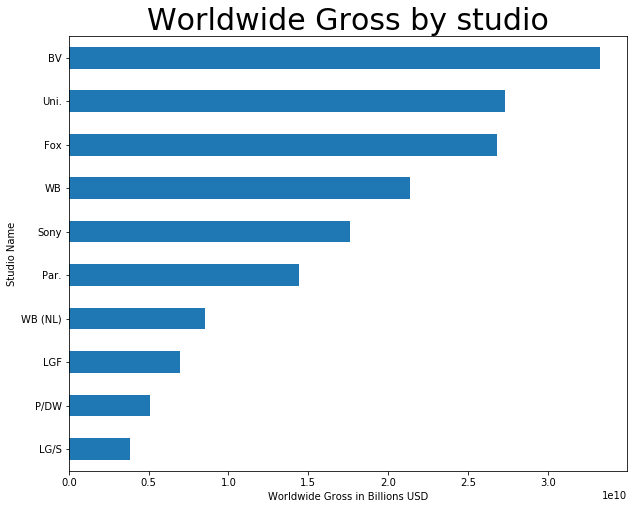

In [181]:
topgrossbystudio.sort_values().plot(kind='barh', figsize=(10,8))
plt.ylabel('Studio Name')
plt.xlabel('Worldwide Gross in Billions USD')
plt.title('Worldwide Gross by studio', size = 30);

In [182]:
topnetbystudio = dfstudio.groupby('studio')['worldwide_net'].sum().sort_values(ascending = False)[:10]

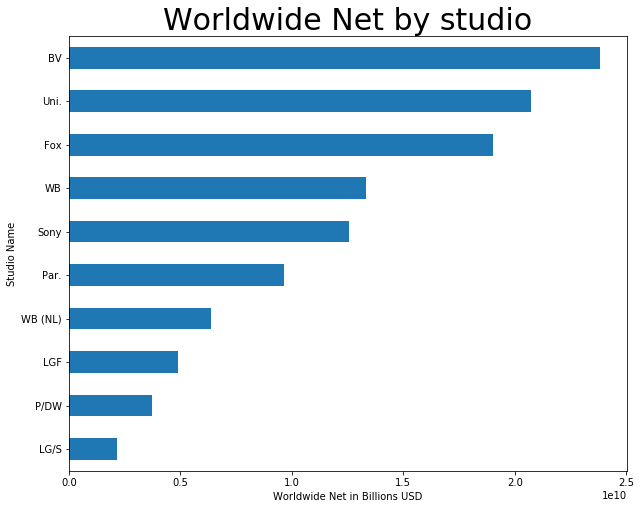

In [183]:
topnetbystudio.sort_values().plot(kind='barh', figsize=(10,8))
plt.ylabel('Studio Name')
plt.xlabel('Worldwide Net in Billions USD')
plt.title('Worldwide Net by studio', size = 30);

In [184]:
averagegrossbystudio = dfstudio.groupby('studio')['worldwide_gross'].median().sort_values(ascending = False)[:10]

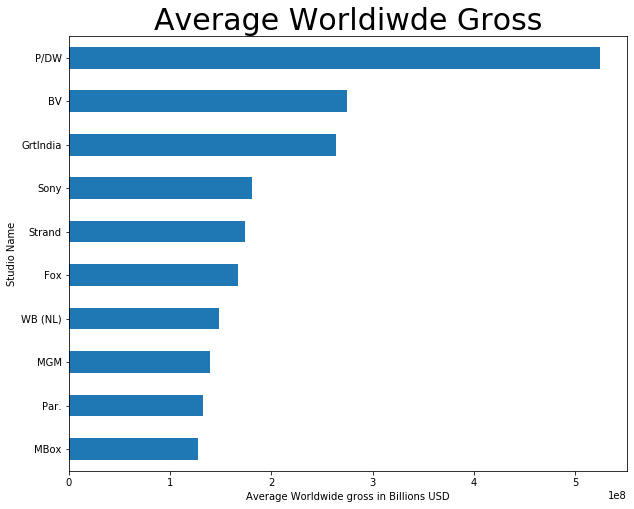

In [174]:
averagegrossbystudio.sort_values().plot(kind='barh', figsize=(10,8))
plt.ylabel('Studio Name')
plt.xlabel('Average Worldwide gross in Billions USD')
plt.title('Average Worldiwde Gross', size = 30);

In [176]:
numberoffilmsbystudio = dfstudio.groupby('studio')['movie'].count().sort_values(ascending = False)[:10]

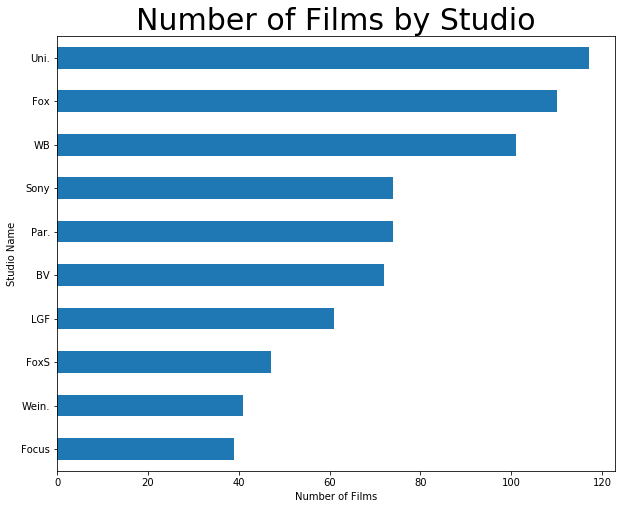

In [178]:
numberoffilmsbystudio.sort_values().plot(kind='barh', figsize=(10,8))
plt.ylabel('Studio Name')
plt.xlabel('Number of Films')
plt.title('Number of Films by Studio', size = 30);

In [169]:
dfBV = dfstudio.loc[dfstudio['studio']=='BV']

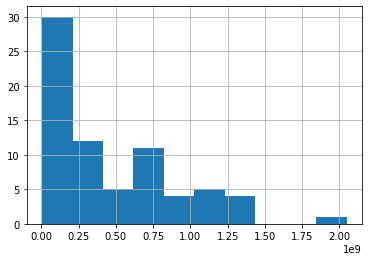

In [171]:
dfBV['worldwide_gross'].hist()

In [189]:
dfstudio.head()

,movie,studio,year,id,release_date,production_budget,domestic_gross,worldwide_gross,foreign_gross,worldwide_net
0,Toy Story 3,BV,2010,47,"Jun 18, 2010",200000000,415004880,1068879522,653874642,868879522
2,Shrek Forever After,P/DW,2010,27,"May 21, 2010",165000000,238736787,756244673,517507886,591244673
3,The Twilight Saga: Eclipse,Sum.,2010,53,"Jun 30, 2010",68000000,300531751,706102828,405571077,638102828
4,Iron Man 2,Par.,2010,15,"May 7, 2010",170000000,312433331,621156389,308723058,451156389
5,Tangled,BV,2010,15,"Nov 24, 2010",260000000,200821936,586477240,385655304,326477240


In [191]:
dfstudio.corr()

,year,id,production_budget,domestic_gross,worldwide_gross,foreign_gross,worldwide_net
year,1.000000,0.057177,0.077206,0.119908,0.131674,0.131409,0.136958
id,0.057177,1.000000,-0.075073,-0.032169,-0.049867,-0.056865,-0.038653
production_budget,0.077206,-0.075073,1.000000,0.702044,0.781983,0.785800,0.657235
domestic_gross,0.119908,-0.032169,0.702044,1.000000,0.938902,0.859291,0.932889
worldwide_gross,0.131674,-0.049867,0.781983,0.938902,1.000000,0.982836,0.983719
foreign_gross,0.131409,-0.056865,0.785800,0.859291,0.982836,1.000000,0.961864
worldwide_net,0.136958,-0.038653,0.657235,0.932889,0.983719,0.961864,1.000000
